# Lecture_04 군집화
<font size=5><b>(Scikit-learn을 활용한 머신러닝)<b></font>
<div align='right'>발표자: Hoe Sung Ryu ( 류 회 성 ) </div>

   
<table align="center">
<td>
<a target="_blank" href="https://colab.research.google.com/drive/1UHalL5YdENo7gvMiZvcpihS5GTfNlk8E?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a> 
</td>
</table>

    
    
![](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F9938463359E015470C)

    
    
---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-로드" data-toc-modified-id="데이터-로드-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 로드</a></span></li><li><span><a href="#차원축소(Dimension-Reduction)" data-toc-modified-id="차원축소(Dimension-Reduction)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>차원축소(Dimension Reduction)</a></span><ul class="toc-item"><li><span><a href="#차원축소-이유" data-toc-modified-id="차원축소-이유-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>차원축소 이유</a></span></li></ul></li><li><span><a href="#PCA-를-사용한-차원축소" data-toc-modified-id="PCA-를-사용한-차원축소-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>PCA 를 사용한 차원축소</a></span></li><li><span><a href="#실루엣과-K-means-clustering-을-이용한-시각화" data-toc-modified-id="실루엣과-K-means-clustering-을-이용한-시각화-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>실루엣과 K-means clustering 을 이용한 시각화</a></span></li></ul></div>

## 데이터 로드

In [1]:
import pandas as pd 
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score # 실루엣 함수 불러오기 
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np 
from utils import * # 사용자 정의함수

In [2]:
# data load 
iris = load_iris()
labels = pd.DataFrame(iris.target)
labels.columns=['Labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal Length','Sepal Width','Petal Length','Petal Width']
data = pd.concat([data,labels],axis=1)
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
print("데이터 형태:", data.shape)

데이터 형태: (150, 5)


## 차원축소(Dimension Reduction)

<img src=https://t1.daumcdn.net/cfile/tistory/99231F415B8A48B418?download width=80%>
<br>

- PCA(Principal Component Analysis): 가장 대표적 차원 축소 기법
- SVD(Singular Value Decomposition): 특이 값 분해
- NMF(Non-negative Matrix Factorization): 비음수 행렬 인수분해 

### 차원축소 이유 
 2차원 또는 3차원으로 차원을 낮춰야 시각화 가능
<img src=https://t1.daumcdn.net/cfile/tistory/202EA6484F0653932C>



In [4]:
# X(독립변수 설정)
X = data.drop('Labels',axis=1)
print("X의 형태", X.shape)

X의 형태 (150, 4)


## PCA 를 사용한 차원축소 

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 줄이고자 하는 차원의 수 
X_pca = pca.fit_transform(X) # fit_transform 변환 

In [6]:
print("PCA 적용 후 X의 형태",X_pca.shape)

PCA 적용 후 X의 형태 (150, 2)


## 실루엣과 K-means clustering 을 이용한 시각화 

> K-means clustering:<p>
 데이터를 입력받아 이를 그룹으로 묶는 알고리즘이다. label이 없는 데이터를 입력받아 군집화(clustering)를 수행한다.
    
> 실루엣:<p>
 a

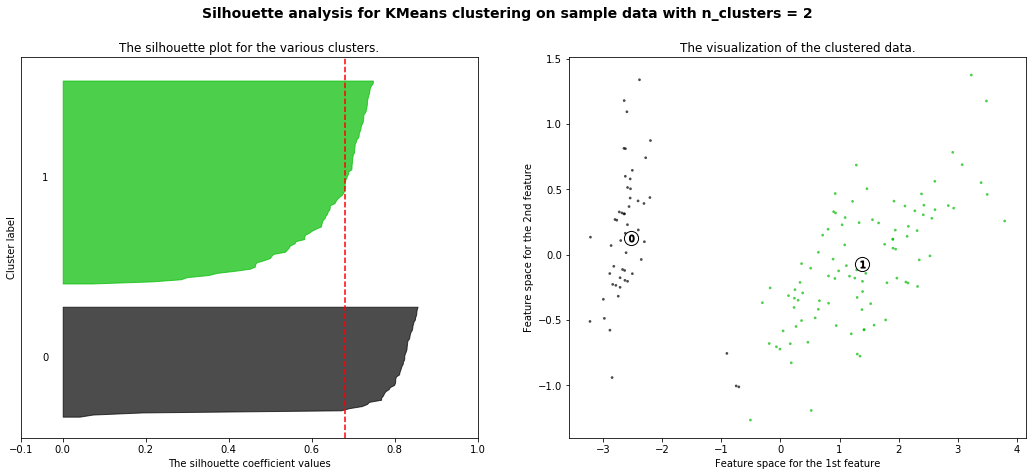

In [7]:
# K-means & silhouette_score
n_clusters = 2
vis_cluster(X,X_pca, n_clusters)

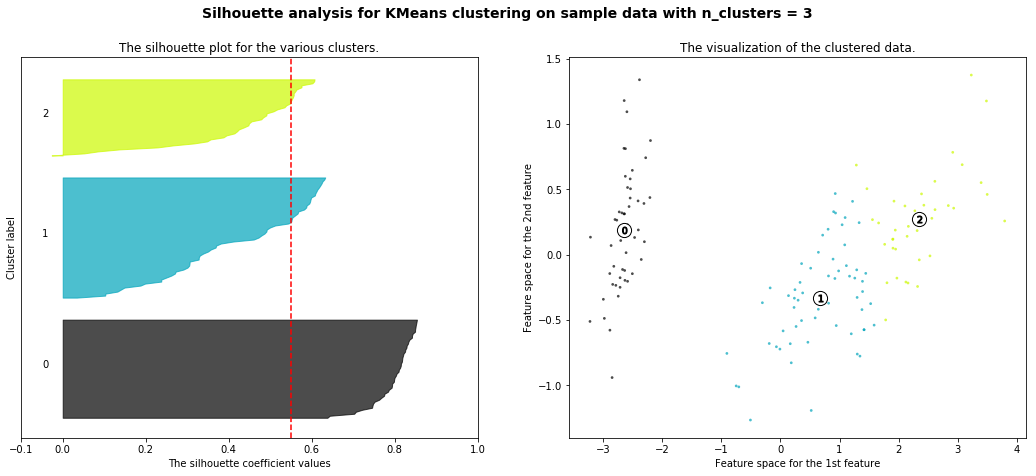

In [9]:
# K-means & silhouette_score
n_clusters = 3
vis_cluster(X,X_pca, n_clusters)

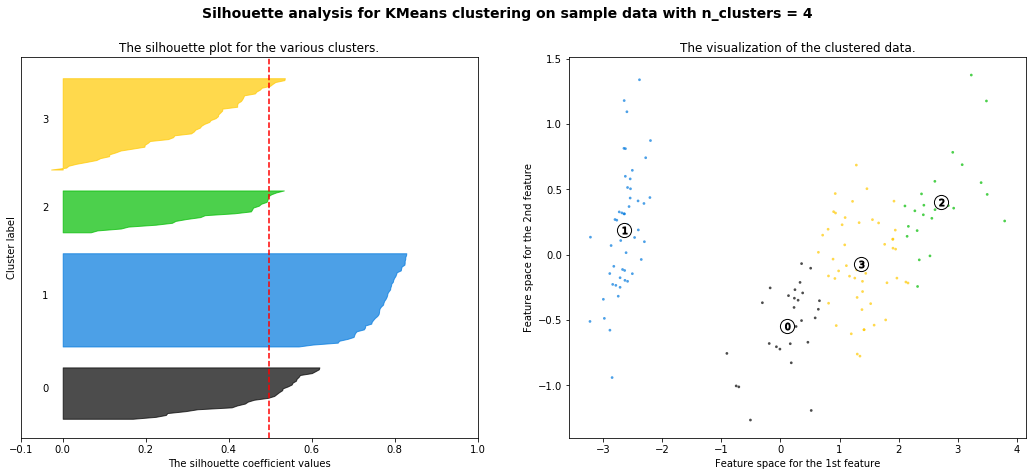

In [10]:
# K-means
n_clusters = 4
vis_cluster(X,X_pca, n_clusters)